In [1]:
library(gganatogram)
library(dplyr)
library(viridis)
library(gridExtra)

Loading required package: ggpolypath
Loading required package: ggplot2

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: viridisLite

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [3]:
other_key

,organ,type,colour,value
1,brain,other,#E41A1C,5.258779
2,heart,other,#377EB8,16.005619
3,kidney,other,#4DAF4A,14.102162
8,UBERON_0014892,other,#984EA3,15.611785
9,UBERON_0014892,other,#FF7F00,15.285633
10,UBERON_0014892,other,#FFFF33,15.519739
,organ,type,colour,value
2,leaf,other,#E41A1C,7.967475
4,root,other,#377EB8,17.794112
9,PO_0009046,other,#4DAF4A,11.409839


In [9]:
# SRP016501 tissues 
tissues <- c('brain',
              'colon',
              'heart',
              'kidney',
              'liver',
              'lung',
              'muscle',
              'spleen',
              'testes')
organism_list <- c('gallus_gallus', 'macaca_mulatta', 'bos_taurus', 'mouse', 'rattus_norvegicus')

In [6]:
?gganatogram 

gganatogram {gganatogram},R Documentation
data,"The main data frame consisting of what organs to plot, colours, and values. Default is NULL"
outline,logical indicating if the outline of the organism should be plotted
fillOutline,Fill colour of outline. Default is #a6bddb
organism,"The organism to be plotted. Currently, only human is accepted."
sex,Sex of the organism
fill,How to fill
anatogram,"A list, similar to hgMale_list that will create the outline and has the corresponding organ data.frames in that list"
ggplot2_only,"If TRUE, will try to use only ggplot2 functionality"


In [7]:
hgMale_key = gganatogram::hgMale_key
head(hgMale_key)

organ,type,colour,value
thyroid_gland,other,#41ab5d,4.672637
bone_marrow,other,#41ab5d,3.310015
frontal_cortex,nervous_system,purple,15.506890
prefrontal_cortex,nervous_system,purple,1.813205
pituitary_gland,other,#41ab5d,12.879309
aorta,circulation,red,17.302852


In [12]:
mmMale_key[]

,organ,colour,type,value
1,aorta,red,circulation,14.47706455
2,brown_adipose_tissue,#41ab5d,other,9.53685827
4,stomach,orange,digestion,11.55583955
5,duodenum,orange,digestion,6.76866760
6,pancreas,orange,digestion,1.54746082
7,spleen,orange,digestion,7.97772017
8,adrenal_gland,#41ab5d,other,17.99342492
9,kidney,orange,digestion,19.91966293
10,colon,orange,digestion,0.26740756
11,small_intestine,orange,digestion,19.74703659


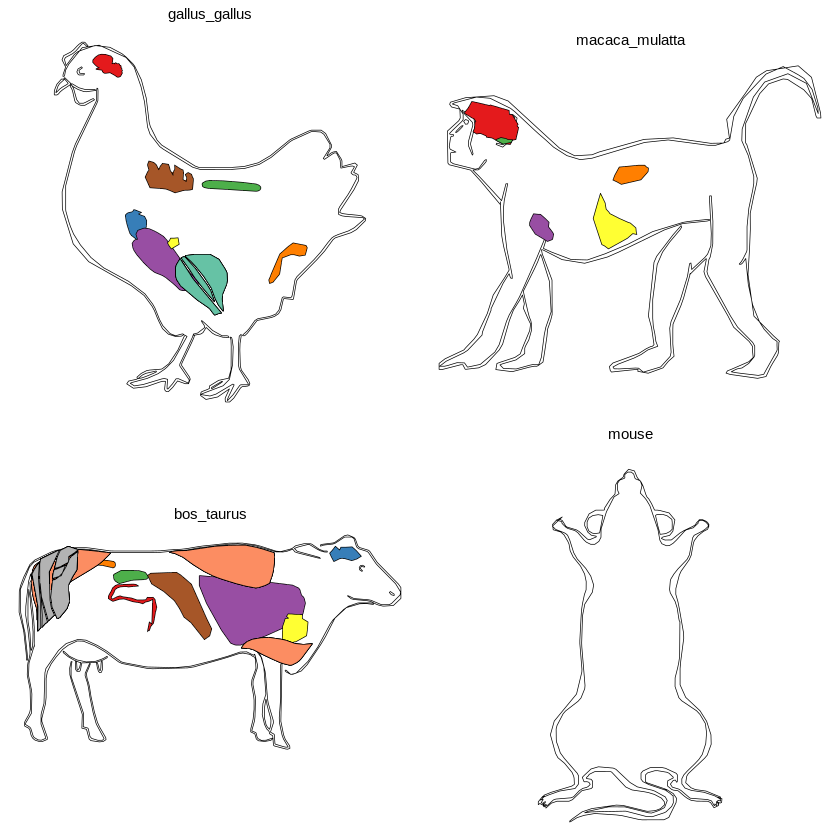

In [10]:
plotList <- list()
for (organism in organism_list) {
    plotList[[organism]] <- gganatogram(data=other_key[[organism]], outline = T, fillOutline='white', organism=organism, sex='male', fill="colour")  +
                theme_void() +
                ggtitle(organism) + 
                theme(plot.title = element_text(hjust=0.5, size=9)) + 
                coord_fixed()
}

do.call(grid.arrange,  c(plotList[1:4], ncol=2))

In [18]:
mmMale_key %>%
    dplyr::filter(organ %in% tissues) %>%
    gganatogram(outline = T, fillOutline='white', organism='mouse', sex='male', fill="colour", show_legend=TRUE)  +
                theme_void() +
                ggtitle(organism) + 
                theme(plot.title = element_text(hjust=0.5, size=9)) + 
                coord_fixed()


ERROR: Error in gganatogram(., outline = T, fillOutline = "white", organism = "mouse", : unused argument (show_legend = TRUE)
